## Ejercicios plotly

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from datetime import datetime

In [39]:
import plotly.io as pio
pio.renderers.default = 'iframe' # Lab
#pio.renderers.default = 'notebook' # Notebook

**ref**: _https://www.kaggle.com/datasets/matthieugimbert/french-bakery-daily-sales_

### Ejercicio 0:
- Carga el DataFrame **`Bakery sales.csv`**.

In [40]:
df = pd.read_csv("Data/Bakery sales.csv")

df

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
...,...,...,...,...,...,...,...
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


### Ejercicio 1:
- Transforma la columna **`unit_price`** a `float`.


- Transforma la columna **`date`** a `datetime`.


- Crea las columnas **`weekday`**, **`month`**, **`year`** y **`hour`**. Las columnas **`weekday`** y **`month`** deben estar representados por nombre, no por número.

In [41]:
df['unit_price'] = df['unit_price'].apply(lambda x: x.split()[0].replace(",", ".")).astype(float)

In [43]:
#df['unit_price'] = df['unit_price'].apply(lambda x: x.replace("€", "").replace(",", ".")).astype(float)

In [44]:
df['datetime'] = df['date'] + " " + df['time']

In [45]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [46]:
df['hour'] = df['datetime'].dt.hour
df['year'] = df['datetime'].dt.year
df['weekday'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()

### Ejercicio 2:

¿A que hora se venden más productos?

- Grafica un histograma usando la columna de `hour` y `quantity`.
- Agrega el parámetro `color = year` y `nbins = 50`.

In [53]:
px.histogram(data_frame = df, 
             x = "hour",
             y = "Quantity",
            color = "year",
            nbins = 50,
             barmode = "group"
            )

### Ejercicio 3:
- De la gráfica anterior quita el filtro por color y separa la gráfica en dos, usando el parámetro `facet_col`.
- Agrega a esa gráfica un violin plot usando el parámetro `marginal`.

In [51]:
px.histogram(data_frame = df, 
             x = "hour",
             y = "Quantity",
            facet_col = "year",
             marginal = "violin",
            nbins = 50)

### Ejercicio 4:

- Filtra el **DataFrame** por las filas donde la columna `article` tenga la palabra **"BAGUETTE"**.
    - ```html
      df[df["article"].str.contains("")]
      ```
    
- Haz una gráfica de **`sunburst`**, separando por año y mes, mostrando la cantidad de elementos vendidos usando el filtro de **"BAGUETTE"**.

In [57]:
df_baguette = df[df['article'].str.contains("BAGUETTE")]

In [59]:
px.sunburst(data_frame = df_baguette,
           values = "Quantity",
           path = ["year", "month"])

### Ejercicio 5:
- Calcula el precio total de cada fila, multiplicando las columnas `quantity` y `unit_price`. Crea una nueva columna `total_article_price` con esta información.

- Elimina las filas donde `quantity` tiene un outlier.

- Haz un violin plot con esa nueva columna.

In [64]:
df['total_article_price'] = df['Quantity'] * df['unit_price']

In [66]:
df

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price,datetime,hour,year,weekday,month,total_article_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,2021-01-02 08:38:00,8,2021,Saturday,January,0.90
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,2021-01-02 08:38:00,8,2021,Saturday,January,3.60
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,2021-01-02 09:14:00,9,2021,Saturday,January,2.40
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,1.15,2021-01-02 09:14:00,9,2021,Saturday,January,1.15
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,2021-01-02 09:25:00,9,2021,Saturday,January,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,0.15,2022-09-30 18:52:00,18,2022,Friday,September,0.15
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,1.20,2022-09-30 18:52:00,18,2022,Friday,September,1.20
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,0.15,2022-09-30 18:52:00,18,2022,Friday,September,0.30
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,1.30,2022-09-30 18:55:00,18,2022,Friday,September,1.30


### Ejercicio 6:
- Agrupa el **DataFrame** por fecha y obten la suma de la columna **`total_article_price`**. Crea un **DataFrame** nuevo.
- Busca la forma de quedarte con la columna **`weekday`** durante la agrupación.
- Haz un line plot con este **DataFrame**, utiliza también la columna **`weekday`**.

In [61]:
df['date'] = pd.to_datetime(df['date'])

In [69]:
df.head(3)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price,datetime,hour,year,weekday,month,total_article_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.9,2021-01-02 08:38:00,8,2021,Saturday,January,0.9
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.2,2021-01-02 08:38:00,8,2021,Saturday,January,3.6
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.2,2021-01-02 09:14:00,9,2021,Saturday,January,2.4


In [84]:
df_2 = df.groupby("date", as_index=False).agg({"total_article_price": "sum", "weekday": "first"})

In [85]:
#df.groupby(["date", "weekday"]).agg({"total_article_price": "sum"})

In [87]:
df_2.head(3)

,date,total_article_price,weekday
0,2021-01-02,987.85,Saturday
1,2021-01-03,1014.30,Sunday
2,2021-01-04,461.90,Monday


In [90]:
px.line(data_frame = df_2, 
       x = "date",
       y = "total_article_price",
       hover_data = ["weekday"])

/home/fede/Documents/venv/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [93]:
df_2_new = df_2.set_index("date")

<AxesSubplot:xlabel='date'>

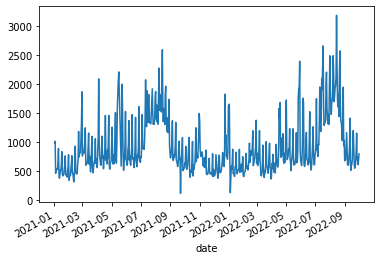

In [99]:
df_2_new['total_article_price'].plot()

<AxesSubplot:xlabel='date'>

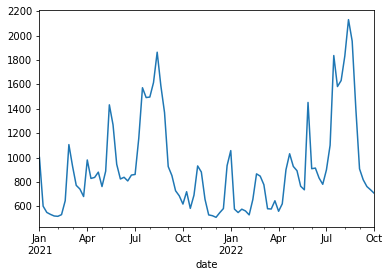

In [98]:
df_2_new.resample("W")['total_article_price'].mean().plot()

### Ejercicio 7:
- Crea un nuevo DataFrame agrupando por la columna **`ticket_number`**, que tenga como columnas la suma de **`quantity`**, **`total_article_price`** y el maximo de **`year`**. Renombra las columnas.

- Haz un box plot usando la columnas **`quantity`** y **`year`**.

In [101]:
df_4 = df.groupby("ticket_number", as_index=False).agg({"Quantity": "sum", 
                                                        "total_article_price": "sum",
                                                        "year": "max"})

In [104]:
df_4.head(3)

,ticket_number,Quantity,total_article_price,year
0,150040.0,4.0,4.50,2021
1,150041.0,3.0,3.55,2021
2,150042.0,5.0,6.00,2021


In [106]:
px.box(data_frame = df_4[df_4['Quantity'].between(0, 50)],
       x = "year",
       y = "Quantity")

### Ejercicio 8:
- Haz un pie plot mostrando el total vendido por día de la semana.
- Haz un pie plot mostrando el total vendido por mes.

In [125]:
df.head(3)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price,datetime,hour,year,weekday,month,total_article_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.9,2021-01-02 08:38:00,8,2021,Saturday,January,0.9
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.2,2021-01-02 08:38:00,8,2021,Saturday,January,3.6
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.2,2021-01-02 09:14:00,9,2021,Saturday,January,2.4


In [131]:
fig = px.pie(data_frame = df,
       names = "weekday",
       values = "total_article_price")

fig.update_traces(textinfo = "label+percent")

In [132]:
fig = px.pie(data_frame = df,
       names = "month",
       values = "total_article_price")

fig.update_traces(textinfo = "label+percent")

### Ejercicio 9:
- Agrupa los datos por la columna **`article`** y crea un nuevo DataFrame, donde las columnas sean la suma de **`quantity`** y **`total_article_price`** y la media de **`unit_price`** y el mínimo/máximo de **`year`**.
- Encuentra cuales son los 20 elementos más vendidos y muestralos en un bar plot, usa la columna **`total_article_price`** con el parámetro `color`.

In [133]:
df_5 = df.groupby("article", as_index=False).agg({"Quantity": "sum",
                                                 "total_article_price": "sum",
                                                 "unit_price": "mean",
                                                 "year": "max"})

In [137]:
df_5_top_20 = df_5.sort_values(by="Quantity", ascending=False).head(20)

In [139]:
px.bar(data_frame = df_5_top_20,
      x = "article",
      y = "Quantity",
      color = "unit_price")

### Ejercicio 10:
- Usando el DataFrame, crea una nueva columna **`article_new`**, si el artículo de esa fila no está entre los 20 más vendidos entonces que tenga el nombre de **`OTRO`**, si el artículo está si entre los 20 más vendidos que no se cambie el nombre.

- Repite el bar plot anterior, esta vez usando todas las filas.

# Adicional

<AxesSubplot:xlabel='weekday'>

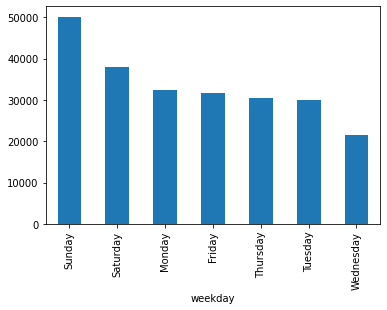

In [109]:
df['weekday'].value_counts().plot.bar()

<AxesSubplot:xlabel='date'>

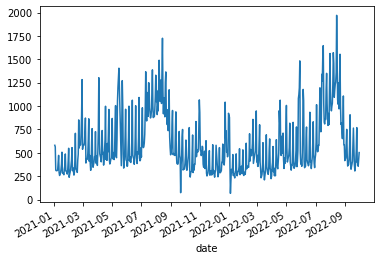

In [112]:
df.groupby("date")['Quantity'].sum().plot()

<AxesSubplot:ylabel='Frequency'>

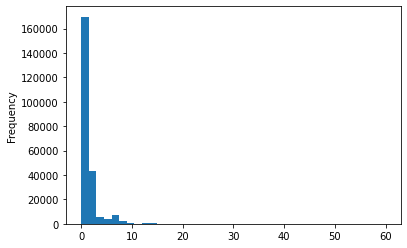

In [117]:
df['unit_price'].plot.hist(bins = 40)

<AxesSubplot:>

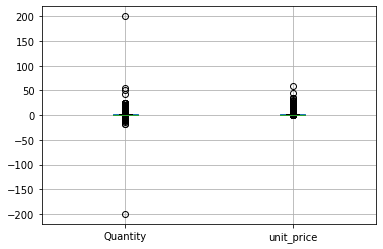

In [121]:
df[['Quantity', 'unit_price']].boxplot()

<AxesSubplot:xlabel='Quantity', ylabel='unit_price'>

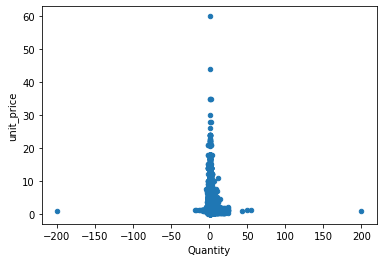

In [124]:
df.plot.scatter(x = "Quantity", y = "unit_price")

In [ ]:
################################################################################################################################